# Transformer Architecture
- Original Transformer is based on the encoder-decoder architecture that is widely used for tasks like machine translation, where a ssequence of words is translated from one langauge to another
## Encoder
- Converts an input sequence opf tokens into a sequnce of embedding vectors, often called the hiddent state or context

## Decoder
- Uses the encoder's hidden state tot iteratively generate an output sequence of tokens, one token at a time.


#Architecture:

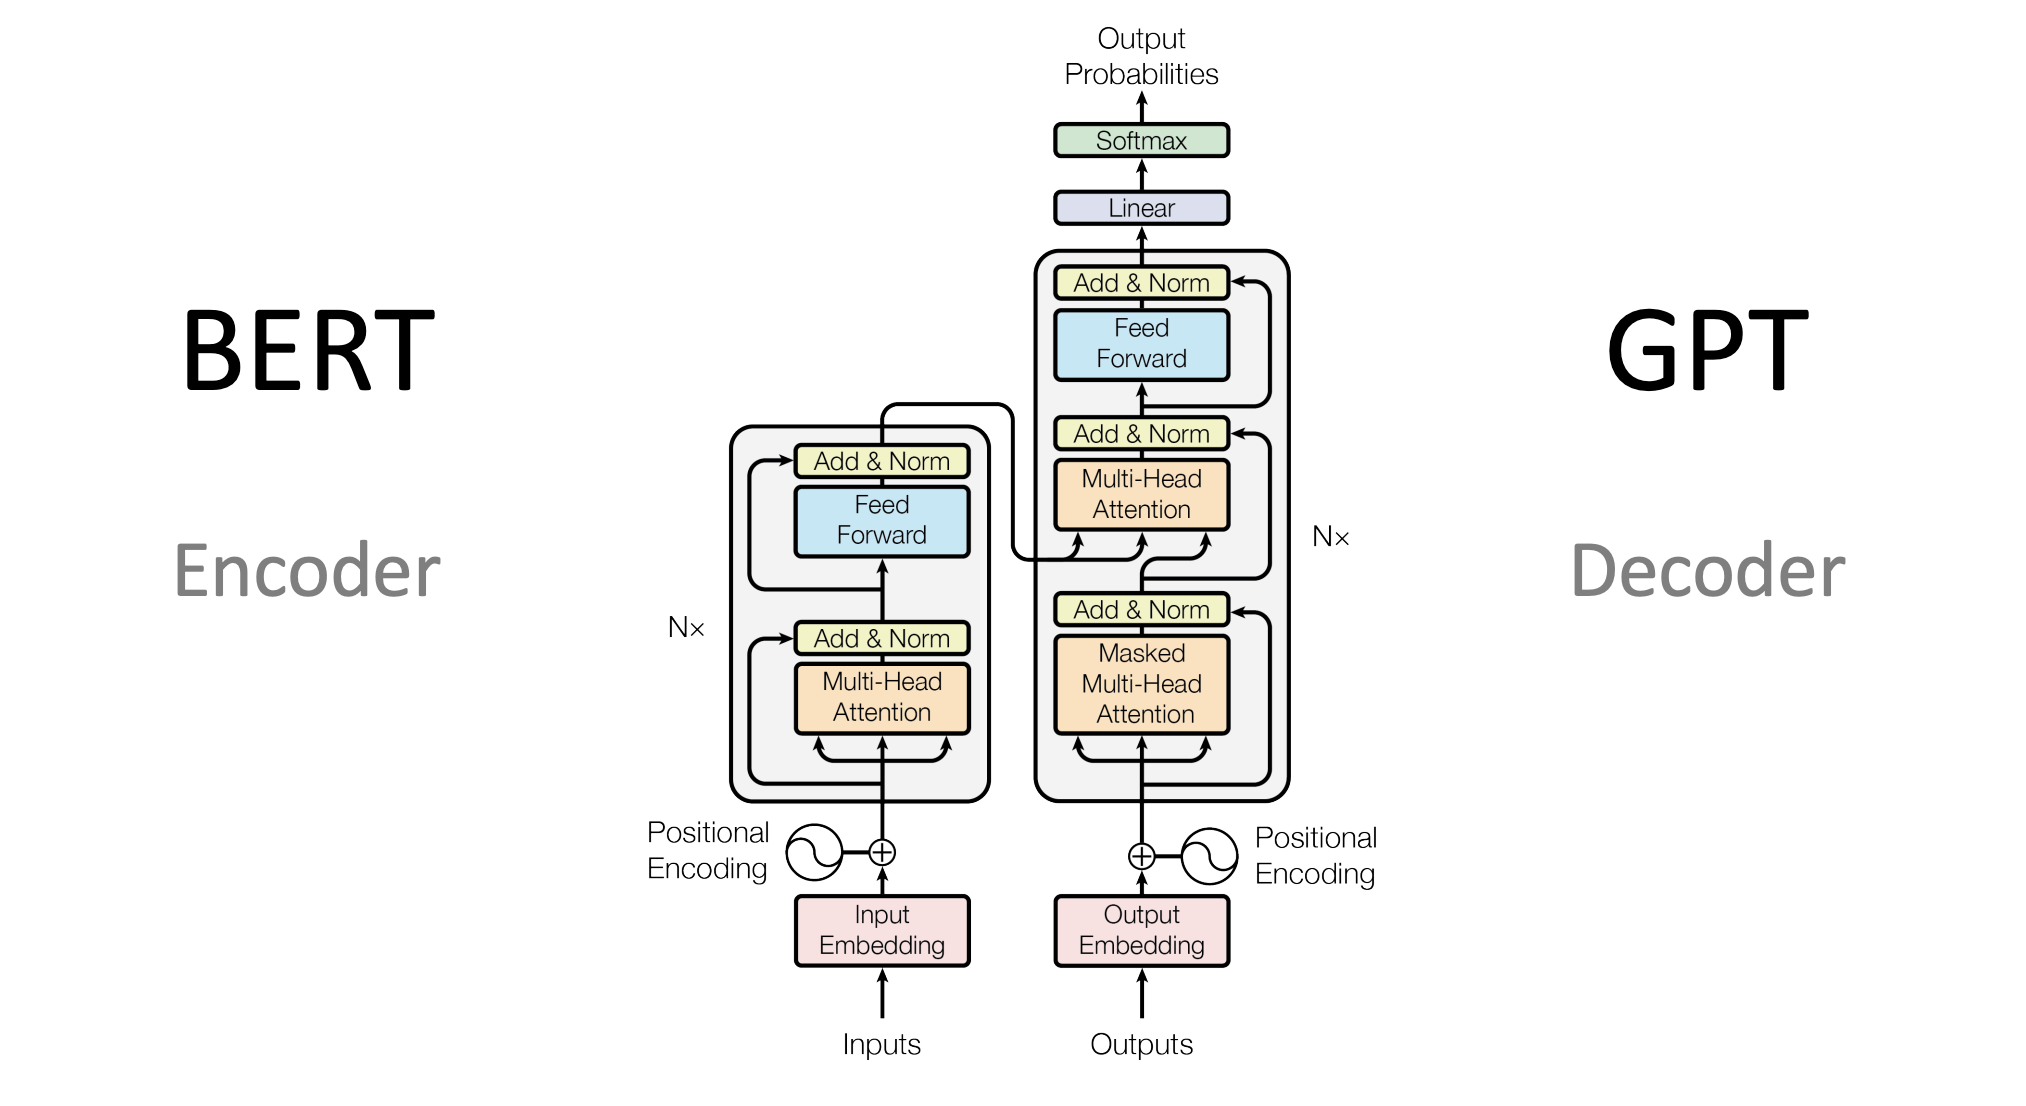




1.    The input text is tokenized and converted to token embeddings. Since the attentiion mechanism is not aware of the relative positions of the tokens, we need a way to inject some infromation about token postions into the input to model the sequential nature of the text.
 - The token embeddings are thus combined with positonal embeddings that contain positional information for each token

2.   The encoder is composed of a stack of encoder layers or "blocks",whic is analogous to stacking **convolutional layers** in computer vision. The same is true of the decoder, which has its own stack of decoder layers.

3. The encoder's output is fed to each decoder layer, and the decoder then generates a prediction for the most probable next token in the sequence.The output of this step is tehn fec back into th edecoder to generate the next token, and so on until a special end-of-sequence(EOS) token is reached.




## Encoder-only
- These models convert an input sequence of text into a rich numerical representation that is well suited for tasks like text classification or named entitiy recognition. BERT and its variants like, RoBERTa and DistilBert, belong to this class of architectures. The representation computed for a given token in this architecture depends both on the left (before the token) and the right (after the token) contexts. This is often called bidirectional attention.


## Decoder-only
- Given a prompt of text like "*Thanks for lunc, I had a...*" these models will autocomplete the sequence by iteratively predicting the most probably next word.
The family of GPT modls belong to this class. The representation computed for a given token in this architecture depends only on the left context. This si often called causal or autoregressive attention


## Encoder-decoder
- These are used for modelling complex mappings from one sequence of text to another; they're suitable for machine translatiion and summarization tasks. In addition to the Transformer architecture, which as we've seen combines an encoder and a decoder, the BART and T5 models belong to this class


# The Encoder
-  Each encoder layer receieves a sequence of embeddings and feeds them through the following sublayers:
  - A multi-head self attention layer
  - A fully connected feed-forward layer that is applied to each input embedding

- The output embeddings of each encoder layer have the same size as the inputs. The main role of the encoder stack is to **update** the input embeddings to produce representations that encode some contextual information in the sequence. For example, the word "apple" will be updated to be more "company-like" and less "fruit-like" if the words "keynote" or phone" are close to it

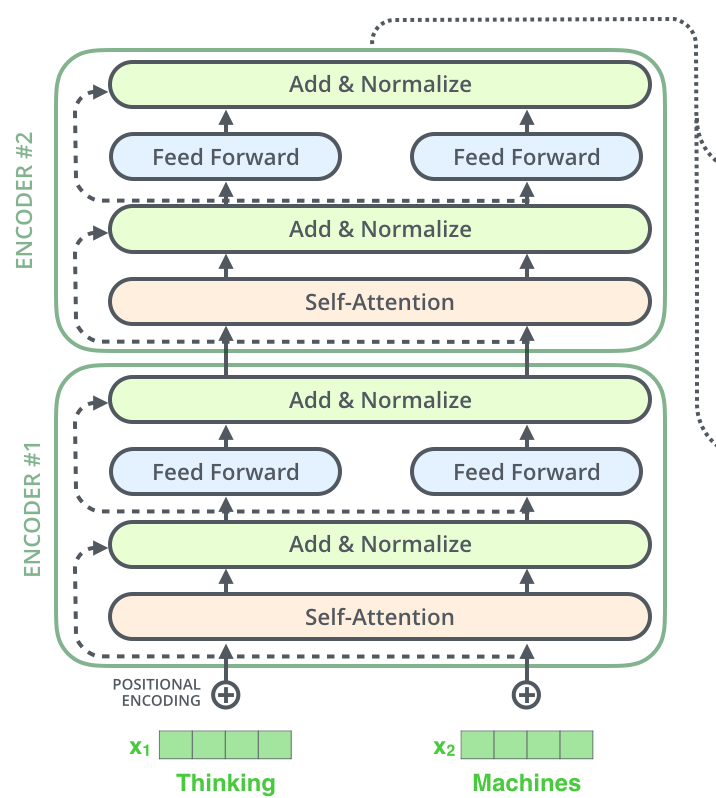

- Each of these sublayers uses skip connections and layer normalization, which are standard tricks to train deep neural networks effectively.

## Self-Attention

- Attention is a mechanism that allows neural networks to assing a different amount of **weights** or *attention* to each element in the sequence.

- For text sequences, the elements are token embeddings where each token is mapped to a vector of some fixed dimension.
 - For example, in BERT each token is represented as 768 dimensional vector. The self part of the self-attention refers to the fact that these weights are computed for all hidden states in the same set: All the hidden states of the encoder.


 - By contrast, the attention mechanism associated with recurrent models involves computing the relevance of each encoder hidden state to decoder hidden state at a given decoding timestep.


 - Main idea behind self-attention is that insteda of using fixed embeddings for each token, we can sue the hwole sequence to compute a *weighted average* of each embedding.

   - Another way to formulate this  is to say that given a sequence of token embeddings x1,....,xn, self-attention produces a sequence of new embeddings x'1,.....x'n where each x'i is a linear combination of all the xj:


    x'ᵢ=Σᴺⱼ=1 wⱼᵢxⱼ

The coefficients wⱼᵢ are called **attention weights** and are normalized so that:

    Σⱼwⱼᵢ=1

To see why averagin the  token embeddings might be a good idea, consider what comes to mind when ou see the word flies. You might think of annoying instects, but if you were given  more contest, like "time flies like an arrow", then you would realize that flies refers to the verb instead. (USE APPPLE HERE).

- Similarly we can create a representation for flies that incroporates this context by combinin all the token embeddings in different proportions,perhaps by assiginng a larger weight w'ⱼᵢ to the token embeddings for time and arrow. Embeddings that are generated in this way are called: **Contextualized Embeddings** and predate the invention of transformers in langauge models like ELMo.




### **Depending on the context,two different represenations for 'flies' can be generated via self-attention**

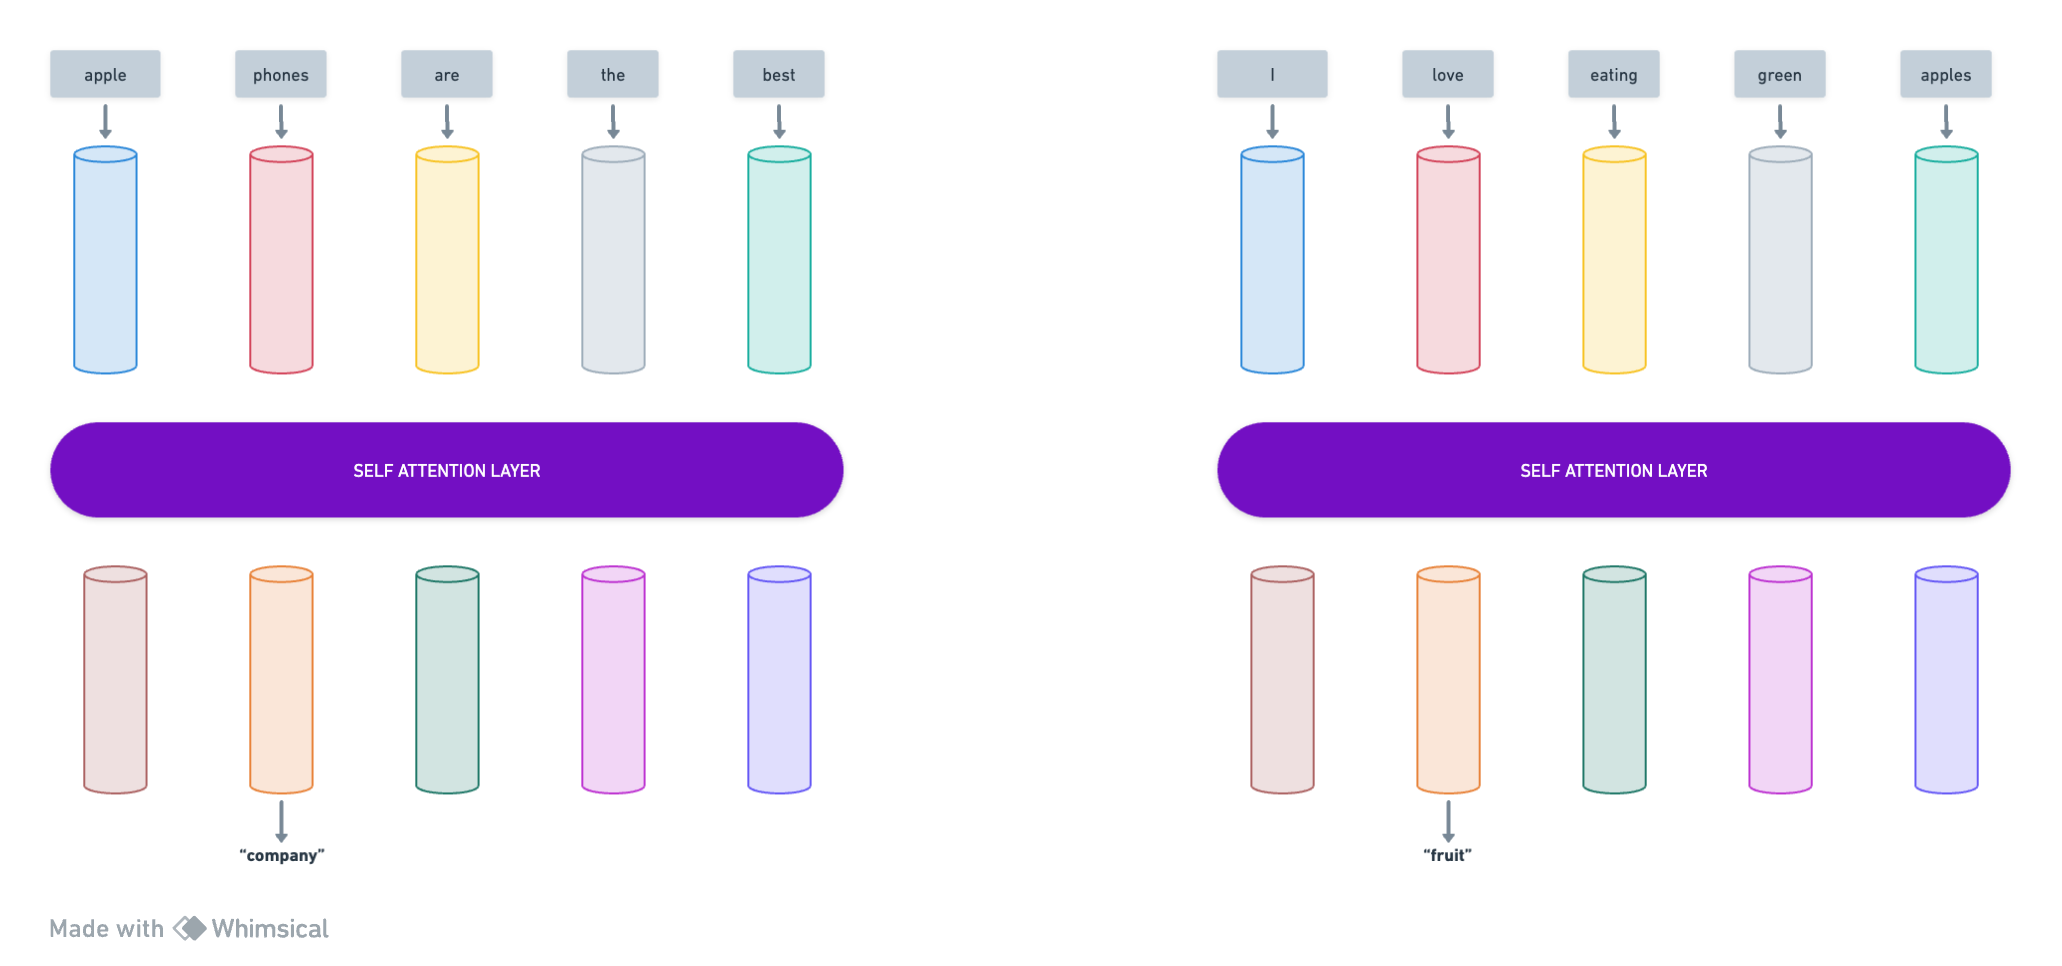

*Diagram showing how self-attention updates raw token embeddings(upper) into contextualized embeddings(lower) to create representations that incorporate information from the whole sequence*

**Scaled dot-product attention**

- There are several ways to implement a self-attention layer, but the most common one is *scaled dot-product attention*, from the paper introducing the Transformer architecture. There are four main steps required to implement this mechanisms.

1. Project each token embedding into three vectors called *query*,*key*, and *value*.
2. **Compute attention scores**. We determine how much the query and key vectors relate to each other using a *similary function*.
    - As the name suggests, the similarity function for scaled dot-product attention is the dot product, computed efficiently using matrix multiplication of the embeddings.

    - Queries and keys that are  similar will have a large dot product, while those tha dont share much in common will have little to no overlap.

    - The outputs from this step are called the attention scores, and for a sequnce with n input tokens thre is a corresponding nxn matrix of attention scores
3. **Compute attention weights**. Dot products can  in general produce arbitrarily large. numbers, which can destabilize the training process. To handle this attention scores are first multiplied by a scaling factor to normalzie their variance and tehn normalized with a softmax to ensure all the column values sum to 1. Th resulting nxn matrix now contains all the attention weights, wⱼᵢ.

4. **Update the token embeddings**. Once the attention weights are computed, we multiply them by the value vector v1,....vn to obtain an updated representation for embedding x'=Σⱼwⱼᵢvⱼ

Visualize how the attention weights are calculated with a nifty library called BertViz for jupyter.

- To visualize attention weights: **neuron_view** module, whihc traces the computation of the weights to show thow the query and key vectors are combined to produce the final weight. Since BertViz needs to tap into the attention layer of the model, we'll instantiate our BERT checkpoint with the model class from BertViz and then use the show() function to generate interactive visulization for a specific encoder layer and attention head.

In [ ]:
!pip install  transformers accelerate datasets  bertviz keras  -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install --upgrade urllib3 -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.9/123.9 kB 2.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.31.39 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.0.4 which is incompatible.


In [ ]:
from transformers import AutoTokenizer
from bertviz.transformers_neuron_view import BertModel
from bertviz.neuron_view import show


model_ckpt="bert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)
model=BertModel.from_pretrained(model_ckpt)

text="apple phones are the best"
show(model,"bert",tokenizer,text,display_mode='dark',layer=0,head=8)

Output hidden; open in https://colab.research.google.com to view.

We can see the values of the query and key vectors are represented as vertical bands, where the instensity of each band corresponds to the magnitude. The connectin lines are weighted according to the attention between the tokens, and we can see that the query vector for 'apple'  has the strongest overlap with the key vector for 'best.

## Demistifying Queries, Keys, and Values

- The names were inspired by information retrieval systems.
   - Analogy: Imagine you're at the supermarket buying all the ingredients you need for your dinner. You have the dish's recipe,and each of the required ingredients can be thought of as a query. As you scan the shelves, you look at the labels(keys) and check whether they match an ingredient on your list (similarity function). If you have a match tehn you take the item (value) from the shelf.

   In this analogy, you only get one grocery item for every label that matches the ingredient. Self-attention is a more abstract and smooth version of this: every label in the supermarket matches the ingredient to the extent to which each key matches the query. So if your list includes a dozen eggs, then you might end up grabbing 10 eggs, an omelete, and a chicken wing.


**Lets look at this process in more detail by implementing the diagram of operation to compute scaled dot-product attention**


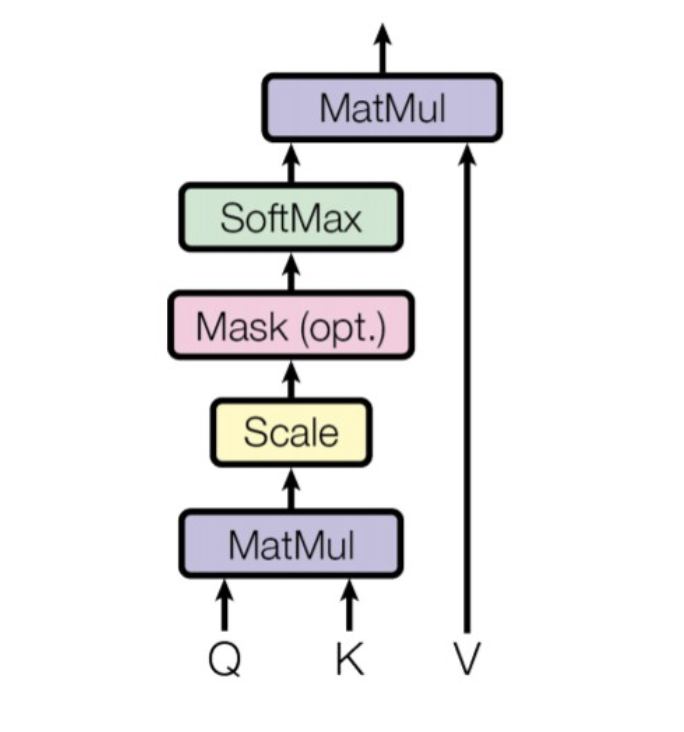

Pytorch is use to implement the Transformer architecture in this chapter, but the steps in TensorFlow are analogous.

| PyTorch                  | TensorFlow (Keras)                  | What does it do?                                      | Analogy / Simple Explanation  |
|--------------------------|-------------------------------------|--------------------------------------------------------|--------------------------------|
| `nn.Linear`              | `keras.layers.Dense`                | Implements a dense neural network layer.               | Adding a staircase in a building. The staircase connects all the rooms (neurons) on one floor (layer) to all the rooms on the next floor. |
| `nn.Module`              | `keras.layers.Layer`                | Base class for all neural network modules.             | The foundation of a building. Everything else is built on top of this. |
| `nn.Dropout`             | `keras.layers.Dropout`              | Implements a dropout layer to regularize the model.    | Turning off some lights in a room to save energy. This helps the model to not rely too much on any one feature. |
| `nn.LayerNorm`           | `keras.layers.LayerNormalization`   | Applies layer normalization.                           | Making sure all the floors in a building have the same level of brightness. This helps the model to train faster and more accurately. |
| `nn.Embedding`           | `keras.layers.Embedding`            | Implements an embedding layer.                         | Assigning a unique key to each room in a building so that it can be easily identified. |
| `nn.GELU`                | `keras.activations.gelu`            | Applies the Gaussian Error Linear Unit activation.    | Deciding whether to open a door in a room or not. Like deciding whether to pass a signal or not. |
| `nn.bmm`                 | `tf.matmul`                         | Performs batched matrix multiplication.                | Constructing multiple rooms at the same time to make things faster. |
| `model.forward`          | `model.call`                        | Defines the computation performed at every call.       | Defining the steps to construct a building. Every time you construct a building, you follow these steps. |



In [ ]:
#First we tokenize th text

inputs=tokenizer(text,return_tensors='pt',add_special_tokens=False)
inputs.input_ids

tensor([[ 6207, 11640,  2024,  1996,  2190]])

Eac token in the sentence has been mapped to a uniqque ID in the tokenizer vocabulary. To keep sthings simple, we've also excluded the [CLS], and [SEP] tokens by setting add_special_tokens=False. Next we need to create some dense embeddings. Dense in this context means that each entry in the embeddings contain a nonzero value. In contrast, the one-hot encodings are sparse, since all entries except one are zero. We do this by using a torch.nn.Embedding layer that acts as alook up table for each input ID

In [ ]:
from torch import nn
from transformers import AutoConfig

config=AutoConfig.from_pretrained(model_ckpt)
token_emb=nn.Embedding(config.vocab_size,config.hidden_size)
print(f'Model Hyperparamters: {config}'+ '\n\n' + '-'*30 +'\n\n' + f'There are: \033[1m{config.vocab_size}\033[0m unique tokens in the vocabulary and \033[1m{config.hidden_size}\033[0m is the size of the embedding vector for each token.')

Model Hyperparamters: BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.32.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}


------------------------------

There are: 30522 unique tokens in the vocabulary and 768 is the size of the embedding vector for each token.


- **In the context of neural networks,** the "hidden size" typically refers to the number of units (or "neurons") in a hidden layer of the network.


- **In the context of the 🤗transformers library by Hugging Face**, the "hidden size" refers to the dimensionality of the hidden layers, or more specifically, the size of the embeddings in the transformer model.


- So, in this context, `config.hidden_size` is the dimensionality of the embedding space. For example, if `config.hidden_size` is **768**, then each token in the vocabulary will be represented by a **768-dimensional** vector.

Token embeddings are at this point independent oftheir context. This means that homonyms words that have the same spellin but different meaning so in the previous example "apple" will have the same representation.  The role of subsequent attention layers will be mix to these token embeddings to disambiguate and inform the representation of each token with the content of its context

In [ ]:
input_embeds=token_emb(inputs.input_ids)
input_embeds.size()

torch.Size([1, 5, 768])

- This has given us a tensor of shape [ batch_size,seq_len,hidden_dim ] , Next step is to crete the query,key,and value vectors and calculate the attention scores using dot product as the similarity function:

In [ ]:
import torch
from math import sqrt

query=key=value=input_embeds
dim_k=key.size(-1)
scores=torch.bmm(query,key.transpose(1,2))/sqrt(dim_k)
scores.size()

torch.Size([1, 5, 5])

This creast a 5x5 matrix of attention scores per sample in the batch.We'll see later that the query,key,and value vectors are generated by applying independent weight matrices Wq,k,v to the embeddings, but for now we've kept them equal for simpliciity. In scaled dot-product attention, the dot products are scaled by the size of the embedding vectors so that we dont get too many large numbers during training which can cause softmax to sature:

- When the input values to the softmax function are very large or very small, the output of the softmax function can become very close to 0 or 1, which means that the gradient (derivative) of the function with respect to its input is very close to 0. This can be a problem during training, because the gradient is used to update the model's parameters. When the gradient is very small, the updates to the parameters will also be very small, which can slow down the training process or cause it to get stuck entirely. This is what is meant by "softmax to saturate".



- In the context of **scaled dot-product attention**, the dot products of the query and key vectors can sometimes be very large, especially when the embedding vectors are high-dimensional. Dividing the dot products by the square root of the dimensionality of the embeddings (scaling) helps prevent the softmax function from saturating, which in turn helps with training the model.




- In machine learning, an "embedding" is a mapping of a discrete variable (e.g., a word) to a vector of continuous numbers. The "dimensionality" of the embedding refers to the length of this vector, or in other words, how many continuous numbers are used to represent each item.

  -  So, a "high-dimensional embedding vector" means that each item (e.g., word) is represented by a large number of continuous numbers. For example, if each word is represented by a vector of 300 numbers, then the embedding vector is 300-dimensional.

 - High-dimensional embeddings can capture more complex relationships between items, but they also require more data to train and more computational resources to use. Conversely, low-dimensional embeddings are computationally cheaper, but may not capture as much information about each item.

In [ ]:
#torch.bmm() function performs a batch matric-matrix product that simplifies the computation of the attention scores where teh query and key vectors have the shape
##[batch_size,seq_len,hidden_dim]

##torch.bmm() takes two batches of amtrices and multipes each matrix from the first batch with the corresponding matric in the second batch

In [ ]:
import torch.nn.functional as F

weights=F.softmax(scores,dim=1)
weights.sum(dim=-1)


tensor([[1., 1., 1., 1., 1.]], grad_fn=<SumBackward1>)

In [ ]:
import torch.nn.functional as F

weights=F.softmax(scores,dim=-1)
weights.sum(-1)

tensor([[1., 1., 1., 1., 1.]], grad_fn=<SumBackward1>)

In [ ]:
#multiply the attention weights by the values
attn_outputs=torch.bmm(weights,value)
attn_outputs.shape

torch.Size([1, 5, 768])

In [ ]:
#AND THTS IT! We've gone throguh all the steps to implement a simplified form of self attention!
#Notice that the whole process is just two matrix multiplications and a softmax, so you can think of "self attention" as just a fancy form of averaging

In [ ]:
def scaled_dot_product_attention(query,key,value):
    dim_k=query.size(-1)
    scores=torch.bmm(query,key.transpose(1,2))/sqrt(dim_k)
    weights=F.softmax(scores,dim=-1)
    return torch.bmm(weights,value)

Our attention mechanism with equal query and key vectors will assign a very large score to identical wrods in the context, and in particular to the current words itself: the dot product of a query with itself is walwys 1. But in practice, the meaning of a word will be better infromed by complementary word in the context than by identical words.


In reality the self attention applies three independent transformaation project the embeddings and each projection carries its own set of learnable parameters, which allows the self attention layer to focus on different semantic aspects ofthe sequence.


Each Projection so called attention head, the resulting multi-head atttention layer is crucial. Because the softmax of one head tends to focus on mostly one aspect of similarity. Having several heads allows the model to focus on several aspetts at once.. For instance, one head can focus on subject-verb iteration, whereas another finds nearby adjectives.
- We dont hadncraft these rletaion into the mdoel, and they are fully learned from the data. If you are familiar with computer vision models, you might see the resembalce to filters in convolutional neural networks, where one filter can be responsible for detecting fcaces and another one finds wheels of cars in images

# Multi-head attention
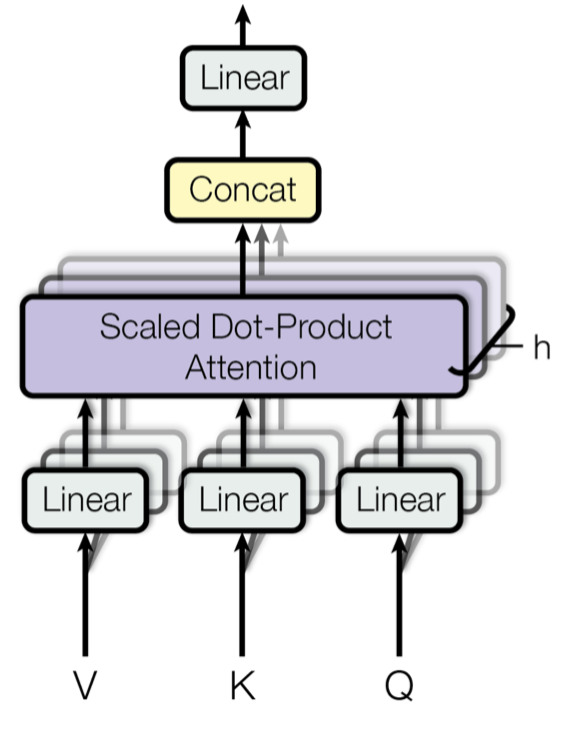

In [ ]:
class AttentionHead(nn.Module):
    def __init__(self,embed_dim,head_dim):
        super().__init__()
        self.q=nn.Linear(embed_dim,head_dim)
        self.k=nn.Linear(embed_dim,head_dim)
        self.v=nn.Linear(embed_dim,head_dim)
    def forward(self,hidden_state):
        attn_outputs=scaled_dot_product_attention(self.q(hidden_state),self.k(hidden_state),self.v(hidden_state))
        return attn_outputs

- Here we intialized three independent linear layers that apply matrix multiplication to the embedding vectors to produce tensors of shape
 [batch_size, seq_len, head_dim]
 -  Where **head_dim** is the number of dimensions we are projecting into.

Although head_dim does not have to be smaller than the number of embedding dimension of the tokens(embed_dim), in practice it is chosen to be a multiple of embed_dim so that the computation across each head is constant.

For example, BER has 12 attention heads, so the dimension of each head is 768/12=64

In [ ]:
# Concatenate Outputs

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self,config):
        super().__init__()
        embed_dim=config.hidden_size
        num_heads=config.num_attention_heads
        head_dim=embed_dim // num_heads
        self.heads=nn.ModuleList([AttentionHead(embed_dim,head_dim) for _ in range(num_heads)])

        self.output_linear=nn.Linear(embed_dim,embed_dim)

    def forward(self,hidden_state):
        x=torch.cat([h(hidden_state) for h in self.heads], dim=-1)
        x= self.output_linear(x)

        return x


Concatenated output from the attention heads is also fed through a final linear layer to produce an output tensor of shape[batch_size,seq_len,hidden_dim] that is suitable for the feed-forward network downstream.

In [ ]:
multihead_attn=MultiHeadAttention(config)
attn_output=multihead_attn(input_embeds)
attn_output.size()

torch.Size([1, 5, 768])

In [ ]:
from bertviz import head_view
from transformers import AutoModel

model=AutoModel.from_pretrained(model_ckpt,output_attentions=True)


In [ ]:

sentence_a="apple phones are the best"
sentence_b="I love eating green apples"

viz_inputs=tokenizer(sentence_a,sentence_b,return_tensors='pt')
attention=model(**viz_inputs).attentions
sentence_b_start=(viz_inputs.token_type_ids==0).sum(dim=1)
tokens=tokenizer.convert_ids_to_tokens(viz_inputs.input_ids[0])

head_view(attention,tokens,sentence_b_start,heads=[8])

Output hidden; open in https://colab.research.google.com to view.

# The Feed-Forward Layer
- The feed-forward sublayer in the encoder and decoder is just a simple two-layer fully connected neural network, but with a twist:
    - instead of processing the whole sequence of embeddings as a single vector, it processes each embedding independently.
    - For this  reason, this layer is often referred to as ***position-wise feed forward layer***.
        - You may also see it referred to as a ***one-dimensional convolution with a kernel size of one***, typically be people with a computer vision background

    - A rule of thumb from the literature is for the hidden size of the first layer to be four times the size of the embeddings, and GELU activation is most commonly used.
    - This is where most of the capacity and memeroization is hypothesized to happen, and it the part that is most often scaled when scaling up the model. We can implement this as simple nn.Module as follows:

In [ ]:
# FEED FORWARD LAYER

class FeedForward(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.linear_1=nn.Linear(config.hidden_size,config.intermediate_size)
        self.linear_2=nn.Linear(config.intermediate_size,config.hidden_size)
        self.gelu=nn.GELU()
        self.dropout=nn.Dropout(config.hidden_dropout_prob)

    def forward(self,x):
        x=self.linear_1(x)
        x=self.gelu(x)
        x=self.linear_2(x)
        x=self.dropout(x)

        return x

Feedforward layer such as nn.Linear is usually applied to a tensor of shape (batch_size,input_dim), where it acts on each elemetn of the batch dimension independently. This is actually true for any dimension except the last one, so when we pass a tensor of shape (batch_size,seq_len,hiddne_dim) the alyers is applied to all token embeddings of the batch and sequence independently.

In [ ]:
config=AutoConfig.from_pretrained(model_ckpt)
feed_forward=FeedForward(config)
ff_outputs=feed_forward(attn_outputs)
ff_outputs.size()

torch.Size([1, 5, 768])

## Adding Layer Normalization

- Transformer architecture makes use of layer normalization and skip connections. The former normalizes each input in the batch to have zero mean and unity variance. Skip connections pass a tensor to the next layer of the model without processing and add it to the processed tensor.

- When it comes to placing the layer normalizatino in the encoder or decoder layer of a transformer, there are two main choices adopted in the literature:

  - *Post layer normalization*
   - This arrangement used in the Transformer paper; it places layer normalization in between the skip connections.
    - In this arrangement, the layer normalization is applied in between the skip connections. This means that first the output of a layer is added to the output of a previous layer (skip connection), and then the resulting sum is normalized. This arrangement was used in the original transformer paper. However, it is tricky to train from scratch because the gradients (the values used to update the model's parameters during training) can become very large or very small, which can cause the training process to become unstable. To address this issue, a technique called "learning rate warm-up" is often used, where the learning rate (a hyperparameter that determines the size of the updates to the model's parameters) is gradually increased from a small value to some maximum value during the early stages of training.

  - *Pre Layer normalization*
    - In this arrangement, the layer normalization is applied within the span of the skip connections. This means that first the output of a layer is normalized, and then the normalized output is added to the output of a previous layer (skip connection). This arrangement is more common in the literature because it tends to be much more stable during training, and it usually does not require any learning rate warm-up

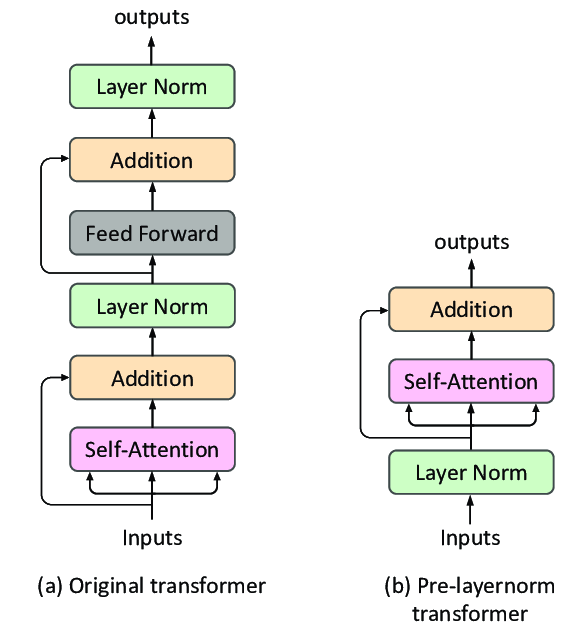

In [ ]:
##PRELAYER TRANSFORMER

class TransformerEncoderLayer(nn.Module):

    def __init__(self,config):
        super().__init__()
        self.layer_norm1=nn.LayerNorm(config.hidden_size)
        self.layer_norm2=nn.LayerNorm(config.hidden_size)
        self.attention=MultiHeadAttention(config)
        self.feed_forward=FeedForward(config)

    def forward(self,x):
        # Apply layer normalziation and then copy input into query, key,value
        hidden_state=self.layer_norm1(x)
        # Apply attention with a skip connection
        x=x+self.attention(hidden_state)
        # Apply feed-forward layer with a skip connection
        x=x+self.feed_forward(self.layer_norm2(x))

        return x

In [ ]:
encoder_layer=TransformerEncoderLayer(config)
input_embeds.shape,encoder_layer(input_embeds).size()

(torch.Size([1, 5, 768]), torch.Size([1, 5, 768]))

We implemented a very first transforme encoder layer but there is caset with the way we set up the encoder layer, they are totally invariant to the position of the tokens. Since the multi-head attention layer is effectively a fancy weighted sum, the information on token position is lost


Thus, we use postional embeddings to get postional information

# Postional Embeddings

- These are based on a simple, yet very effective idea: augment the token embeddings with a position-dependent pattern of values arranged in a vector.

- If the pattern is characteristic for each position, the attention heads and feed-foward layers in each stack can learn to incorporate positional information into their transformations

- There are several ways to acheive this
 - On popular appraoch: To use a learnable pattern, especially when the pretraining datasset is sufficiently large.
    - This works exactly the same way as the token embeddings, but using the position index instead of the token ID as input. With that approach, an efficient way of encodeing the positions of tokens is learned during pretraining

In [ ]:
class Embeddings (nn.Module):
    def __init__(self,config):
        super().__init__()
        self.token_embeddings=nn.Embedding(config.vocab_size,config.hidden_size)
        self.position_embeddings=nn.Embedding(config.max_position_embeddings,config.hidden_size)
        self.layer_norm=nn.LayerNorm(config.hidden_size,eps=1e-12)
        self.dropout=nn.Dropout()

    def forward(self,input_ids):
        # Create position IDs for input sequence
        seq_length=input_ids.size(1)
        position_ids=torch.arange(seq_length,dtype=torch.long).unsqueeze(0)
        #Create token and position embeddings
        token_embeddings=self.token_embeddings(input_ids)
        position_embeddings=self.position_embeddings(position_ids)
        #Combine token  and position embeddings
        embeddings=token_embeddings+position_embeddings
        embeddings=self.layer_norm(embeddings)
        embeddings=self.dropout(embeddings)
        return embeddings

embedding_layer=Embeddings(config)
embedding_layer(inputs.input_ids).size()

torch.Size([1, 5, 768])

We see tht embedding layer now create a single, dense embedding for each token.

While learnable position embeeddings are easy to implelemnnt and widely used, there are some alternatibes:

- *Absolute positionla represnetations*
 - Transformer models can use static patterns consisting of modualted sine and cosine signals to encode the positions of the tokens. This works especially well when there are not large volumes of data available

 - *Relative positional representations*
  - Although absolute positions are important one can argue that when computing an embedding, the surrounding tokens are most important. Relative positional representations follwo that intuition and encode the relative positions between tokens. this cannot be set up by just introducing a new relative embedding layer at the begining since the relative embedding changes for each token depdning on where from the sequence we are attending to it.

  - Instead the attention mechnaism itself is modified with additional terms that take the relative position between tokens into account.



In [ ]:
class TransformerEncoder(nn.Module):

    def __init__(self,config):
        super().__init__()
        self.embeddings=Embeddings(config)
        self.layers=nn.ModuleList([TransformerEncoderLayer(config)for _ in range(config.num_hidden_layers)])

    def forward(self,x):
        x=self.embeddings(x)
        for layer in self.layers:
            x=layer(x)
        return x
encoder=TransformerEncoder(config)
encoder(inputs.input_ids).size()

torch.Size([1, 5, 768])

We can see that we get a hidden state for each token in the batch. This output format makes the achitecture very flexible, and we can easily adapt it for various application such as predicting missing tokens in masked language modeling or predicting the start and end position of an answer in question answering

## Adding A Classification Head

- Transformer models are usually divided into a task-independent body and a taks specifc head
  - What we have built so far is the body, so if we wish to build a text classifier, we will need to attach a classification head to that body.
    - We have a hidden state for each token,but we only need to make one prediction.
    - There are several options to approach this:
      - Traditionally, the first token in such models is used for prediction and we can attach a dropout and a linear layer to make a classification prediction.

In [ ]:
class TransformerForSequenceClassification(nn.Module):
    def __init__(self,config):
        super().__init__()
        self.encoder=TransformerEncoder(config)
        self.dropout=nn.Dropout(config.hidden_dropout_prob)
        self.classifier=nn.Linear(config.hidden_size,config.num_labels)

    def forward(self,x):
        x=self.encoder(x)[:,0,:] #select hidden state of [CLS] token
        x=self.dropout(x)
        x=self.classifier(x)
        return x

### Before initializing the model we need to define how many classes we would like to predict:

In [ ]:
config.num_labels=3
encoder_classifier=TransformerForSequenceClassification(config)
encoder_classifier(inputs.input_ids).size()

torch.Size([1, 3])

This is eaxtly what we have been looking for,  for eaxh example in the batch we get the unnormalized logits for each class in the output

# The Decoder

- Main differnce between the decoder and encoder is that the decoder has two attention sublayers

 - *Masked multi-head self-attention layer*
    - Ensures that the tokens we generate at each timestep are only based on the past outputs and the current token being predicted. Without this, the decoder could cheat during traning by simply copying the target translations: masking the inputs ensure the task is not trivial

 - *Encoder-decoder attention layer*
    - Performs multi-head attention over the output key and value vectors of the encoder stack, with the intermediate representations of the decoder acting as the queriies.
    - This way the encoder-decoder attention layer learns how to realte tokens from two differnt sequences, such as two different langauges. The decoder has acess to the encoder keys and values in each block

In [ ]:
# The trick with masked self-attention is to introduce a mask matrix with ones on the lower diagonal and zeros above:
seq_len=inputs.input_ids.size(-1)
mask=torch.tril(torch.ones(seq_len,seq_len)).unsqueeze(0)
mask[0]

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

We used PyTorch's tril() function to create the lower traingular matrix.
 Once we have this mask mastrix, we can prevent each atttention head from peeking at future tokens by using Tensor.masked_fill() to replace all the zeros with negative infinity:

In [ ]:
scores.masked_fill(mask==0,-float("inf"))

tensor([[[28.4944,    -inf,    -inf,    -inf,    -inf],
         [ 0.1721, 26.2439,    -inf,    -inf,    -inf],
         [-1.2854, -0.3178, 28.3528,    -inf,    -inf],
         [ 0.1304,  1.6264, -0.0517, 29.0127,    -inf],
         [ 0.6592, -0.1561,  0.3075,  0.9760, 24.7103]]],
       grad_fn=<MaskedFillBackward0>)

- By setting the upper values to negative infinity we guarantee that the attention weights are all zero once we take the softmax over the scores because e-∞=0 (recall that softmax calcualtes the normalized exponential).
- We can easily include this masking behaivor with a small change to our scaled dot-product attention function

In [ ]:
def scaled_dot_product_attention(query,key,value,mask=None):
    dim_k=query.size(-1)
    scores=torch.bmm(query,key.transpose(1,2))//sqrt(dim_k)
    if mask is not None:
        scores=scores.masked_fill(mask==0,-float('inf'))
    weights=F.softmax(scores,dim=-1)
    return weights.bmm(value)

## Demistifying Encoder-Decoder Attention

- Imagine you (the decoder) are in class taking an exam. Your task is to predic the next word based on the previous words(decoder inputs), which sounds simple but is incredibly hard.

- Fortunately, your neighbor (the encoder) has the full text. Unfrotunaltely, they're a foreign exchange student and the text is in their native language. Cunning students that you ar, you figure out a way to cheat anyway.

 1. You draw a little cartoon illsutrating the text you already have (the query) and give it to your neighbor
 2. They try to figure out which passage matches that description (the key)
 3. Draw a cartoon describing the word following that passage (the value) and pass that back to you.

